# Oscillation Based Spectroscopy for Cell Culture monitorization
This Notebook contains all the code and simulations presented in the article entitled Oscillation Based Spectroscopy for Cell Culture monitorization.

Submitted for review: 16.12.2021

In [14]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import scipy.io as sio
import symlib as sl
import numpy as np
from OscillationBasedSpectrometer import *

In [15]:
# Global Objects. 
fl = np.logspace(.1, 6, 50)
Comp_ = sl.Comparator(Vref=3.3)

def getCellModels(Rgap = 1000, ff_n = 10):
    model_list = []
    ff = np.linspace(0.1, 0.9, num=ff_n)
    for f in ff:
        BZ = sl.BioZ_Cells(Rin=100e3, Rct = 1.3e6, Cdl = 32e-9, Rs = 455, Rgap = Rgap, ff=f)
        model_list.append(BZ)
    return model_list, ff

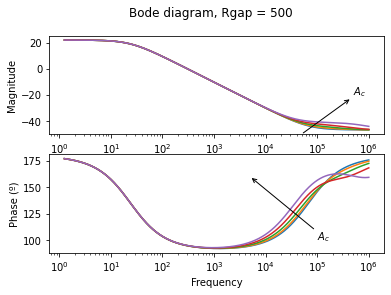

In [16]:
# Figure 3. Electrical response for Hz(S) with R_ct=1.3MΩ, 
# C_dl=3.2 nF, R_s=455Ω, R_gap=500Ω and variations for A_c ∈(0,A). 
Rgap = 500
C_M, ff_list = getCellModels(Rgap = Rgap, ff_n = 5)

fig, (ax1, ax2) = plt.subplots(2, 1)
for (BZ, ff) in zip(C_M, ff_list):
    BZ.plot(title = "Bode diagram, Rgap = "+str(Rgap), fig=fig, ax1=ax1, ax2=ax2)

ax1.annotate("$A_c$",
            xy=(5e4, -50), xycoords='data',
            xytext=(5e5, -20), textcoords='data',
            arrowprops=dict(arrowstyle="<-",
                            connectionstyle="arc3"),
            )

ax2.annotate("$A_c$",
            xy=(5e3, 160), xycoords='data',
            xytext=(1e5, 100), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.savefig("./figs/F3")
plt.show();

In [17]:
plt.close()

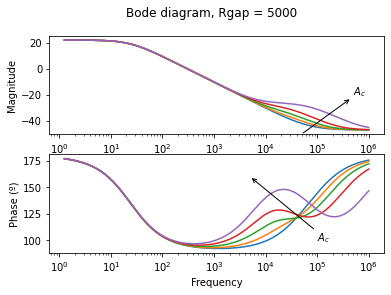

In [18]:
# Figure 4. Electrical response for Hz(S) with R_ct=1.3MΩ, 
# C_dl=32 nF, R_s=455Ω, R_gap=5000Ω and variations for A_c ∈(0,A). 
Rgap = 5000
C_M, ff_list = getCellModels(Rgap = Rgap, ff_n = 5)

fig, (ax1, ax2) = plt.subplots(2, 1)
for (BZ, ff) in zip(C_M, ff_list):
    BZ.plot(title = "Bode diagram, Rgap = "+str(Rgap), fig=fig, ax1=ax1, ax2=ax2)

ax1.annotate("$A_c$",
            xy=(5e4, -50), xycoords='data',
            xytext=(5e5, -20), textcoords='data',
            arrowprops=dict(arrowstyle="<-",
                            connectionstyle="arc3"),
            )

ax2.annotate("$A_c$",
            xy=(5e3, 160), xycoords='data',
            xytext=(1e5, 100), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.savefig("./figs/F4")
plt.show();

In [19]:
plt.close()

In [20]:
# Simulations for Different Rgap values (Figure 5)
Q = 10
Rgap = [500, 1000, 2000, 5000]

for rg in Rgap: 
    C_M, ff_list = getCellModels(Rgap = rg, ff_n = 10)
    for (BZ, ff) in zip(C_M, ff_list):
        OBS_ = OBS(BZ, None, Comp_, G=1, Q=10, f_list=fl)
        OBS_.runJob()
        OBS_.appendMat("Cell_ff_Q"+str(Q)+"_Rgap"+str(rg)+".mat", key="ff"+str(int(np.round(100*ff))))
    print("Completed simulation for Rgap = ", rg)


Completed simulation for Rgap =  500
Completed simulation for Rgap =  1000
Completed simulation for Rgap =  2000
Completed simulation for Rgap =  5000


<Figure size 432x288 with 0 Axes>

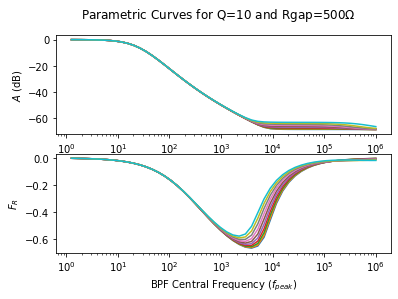

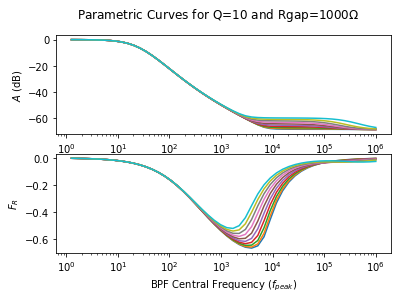

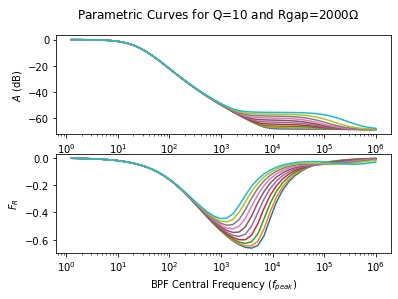

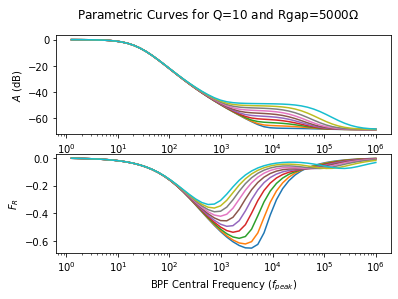

In [26]:
# Figure 5. Oscillation Based (OB) Spectroscopy system for different values of R_gap parameter, with Q_f=10. 
plt.figure(1)
model = "Cell_ff"
Q = 10
Rgap = [500, 1000, 2000, 5000]
i = 1
for rg in Rgap: 
    file = "./matfiles/"+model+"_Q"+str(Q)+"_Rgap"+str(rg)+".mat"
    mdict = sio.loadmat(file)

    fig, (ax1, ax2) = plt.subplots(2, 1)
    ax1.set(ylabel="$A$ (dB)")
    ax2.set(xlabel="BPF Central Frequency ($f_{peak}$)", ylabel="$F_R$")
    fig.suptitle("Parametric Curves for Q="+str(Q)+" and Rgap="+str(rg)+"$\Omega$")

    for key in mdict.keys():
        if('_' in key):
            pass
        else:
            obs = mdict[key]
            F, A, W = obs['F'][0][0][0], obs['A'][0][0][0], obs['W'][0][0][0]
            nF, nA = [], []
            mA = max(A)
            for f, a, w in zip(F, A, W):
                nF.append((w - f) / f)
                nA.append(20 * np.log10(a/mA))

            ax1.semilogx(F, nA)
            ax2.semilogx(F, nF)
    plt.savefig("./figs/F5."+str(i)+".png")
    plt.show()
    i += 1

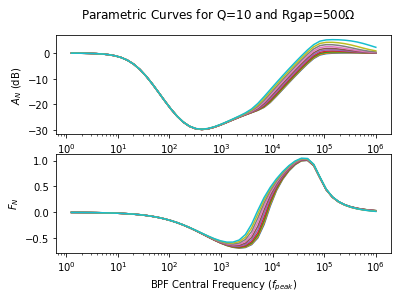

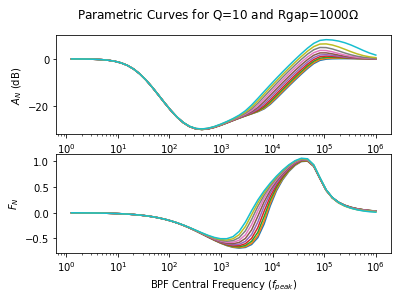

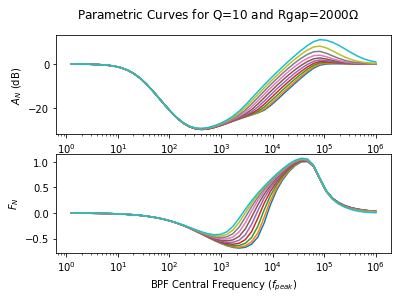

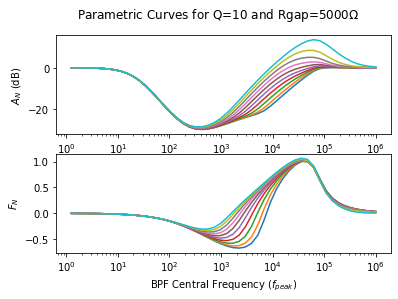

In [27]:
# Figure 6.
Q = 10
CellBase = sl.BioZ_base(Rin=100e3, Rct = 1.3e6, Cdl = 3.2e-9, Rs = 455)
OBS_ = OBS(CellBase, None, Comp_, G=1, Q=Q, f_list=fl)
OBS_.runJob()
OBS_.saveMat("CellBase_Q"+str(Q)+".mat", key = "data")

file = "./matfiles/CellBase_Q"+str(Q)+".mat"
obs = sio.loadmat(file)["data"]

F, A, W = obs['F'][0][0][0], obs['A'][0][0][0], obs['W'][0][0][0]
baseF, baseA, baseW = [], [], []

mA = max(A)
for f, a, w in zip(F, A, W):
    baseF.append(f)
    baseW.append(w)
    baseA.append(a)

model = "Cell_ff"
Rgap = [500, 1000, 2000, 5000]
i = 1
for rg in Rgap: 
    file = "./matfiles/"+model+"_Q"+str(Q)+"_Rgap"+str(rg)+".mat"
    mdict = sio.loadmat(file)

    fig, (ax1, ax2) = plt.subplots(2, 1)
    ax1.set(ylabel="$A_N$ (dB)")
    ax2.set(xlabel="BPF Central Frequency ($f_{peak}}$)", ylabel="$F_N$")
    fig.suptitle("Parametric Curves for Q="+str(Q)+" and Rgap="+str(rg)+"$\Omega$")

    for key in mdict.keys():
        if('_' in key):
            pass
        else:
            obs = mdict[key]
            F, A, W = obs['F'][0][0][0], obs['A'][0][0][0], obs['W'][0][0][0]
            nF, nA = [], []
            
            for f, a, w, ba, bw in zip(F, A, W, baseA, baseW):
                nA.append(20*np.log10(a/ba))
                nF.append( np.log(w / bw) )

            ax1.semilogx(F, nA)
            ax2.semilogx(F, nF)
    plt.savefig("./figs/F6."+str(i)+".png")
    plt.show()
    i += 1

In [23]:
# Simulations for Different Q values (Figure 7-8)
Q = [4, 7, 15, 30]
Rgap = 500

for q in Q: 
    C_M, ff_list = getCellModels(Rgap = Rgap, ff_n = 10)
    for (BZ, ff) in zip(C_M, ff_list):
        OBS_ = OBS(BZ, None, Comp_, G=1, Q=q, f_list=fl)
        OBS_.runJob()
        OBS_.appendMat("Cell_ff_Q"+str(q)+"_Rgap"+str(Rgap)+".mat", key="ff"+str(int(np.round(100*ff))))
    print("Completed simulation for Q = ", q)

Completed simulation for Q =  4
Completed simulation for Q =  7
Completed simulation for Q =  15
Completed simulation for Q =  30


<Figure size 432x288 with 0 Axes>

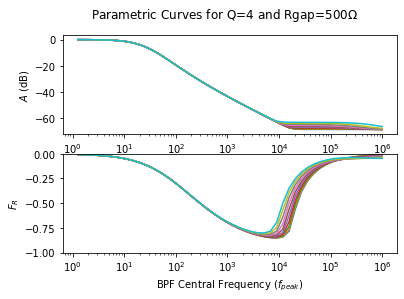

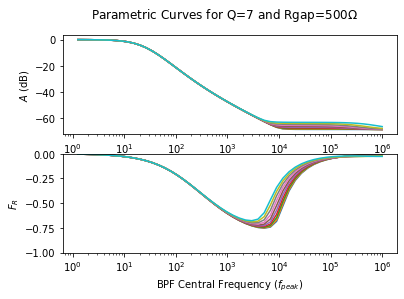

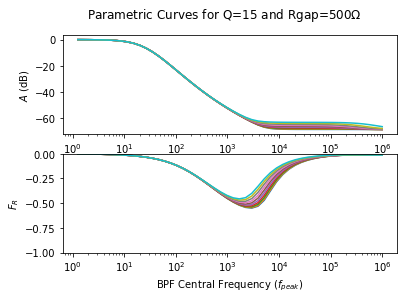

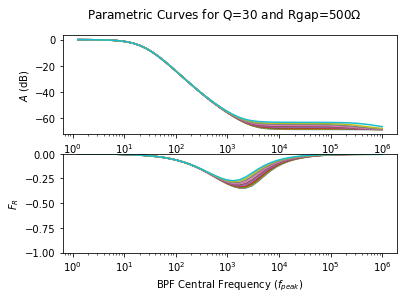

In [31]:
# Figure 7. Oscillation Based (OB) Spectroscopy system for different values of Q parameter, with R_gap=500. 
plt.figure(1)
model = "Cell_ff"
Q = [4, 7, 15, 30]
Rgap = 500
i = 1
for q in Q: 
    file = "./matfiles/"+model+"_Q"+str(q)+"_Rgap"+str(Rgap)+".mat"
    mdict = sio.loadmat(file)

    fig, (ax1, ax2) = plt.subplots(2, 1)
    ax1.set(ylabel="$A$ (dB)")
    ax2.set(xlabel="BPF Central Frequency ($f_{peak}$)", ylabel="$F_R$")
    fig.suptitle("Parametric Curves for Q="+str(q)+" and Rgap="+str(Rgap)+"$\Omega$")

    for key in mdict.keys():
        if('_' in key):
            pass
        else:
            obs = mdict[key]
            F, A, W = obs['F'][0][0][0], obs['A'][0][0][0], obs['W'][0][0][0]
            nF, nA = [], []
            mA = max(A)
            for f, a, w in zip(F, A, W):
                nF.append((w - f) / f)
                nA.append(20 * np.log10(a/mA))

            ax1.semilogx(F, nA)
            ax2.semilogx(F, nF)
            ax2.set_ylim([-1, 0])
    plt.savefig("./figs/F7."+str(i)+".png")
    plt.show()
    i += 1

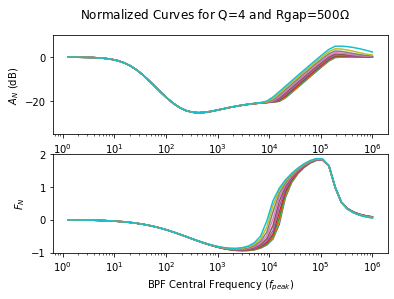

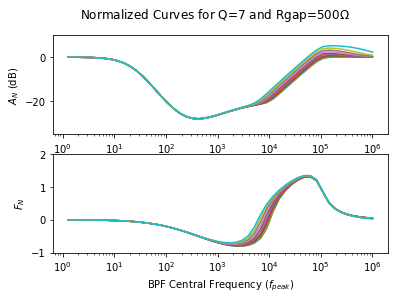

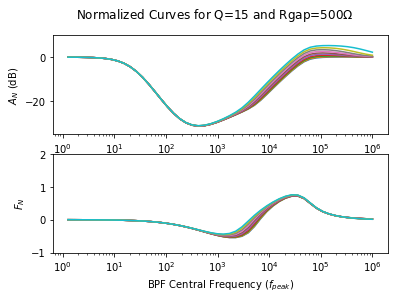

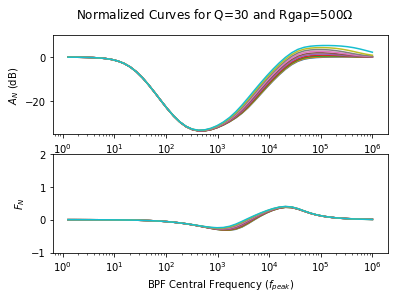

In [30]:
# Figure 8.

Q = [4, 7, 15, 30]
Rgap = 500
i = 1
for q in Q:
    CellBase = sl.BioZ_base(Rin=100e3, Rct = 1.3e6, Cdl = 3.2e-9, Rs = 455)
    OBS_ = OBS(CellBase, None, Comp_, G=1, Q=q, f_list=fl)
    OBS_.runJob()
    OBS_.saveMat("CellBase_Q"+str(q)+".mat", key = "data")

    file = "./matfiles/CellBase_Q"+str(q)+".mat"
    obs = sio.loadmat(file)["data"]

    F, A, W = obs['F'][0][0][0], obs['A'][0][0][0], obs['W'][0][0][0]
    baseF, baseA, baseW = [], [], []

    mA = max(A)
    for f, a, w in zip(F, A, W):
        baseF.append(f)
        baseW.append(w)
        baseA.append(a)

    model = "Cell_ff"
    file = "./matfiles/"+model+"_Q"+str(q)+"_Rgap"+str(Rgap)+".mat"
    mdict = sio.loadmat(file)

    fig, (ax1, ax2) = plt.subplots(2, 1)
    ax1.set(ylabel="$A_N$ (dB)")
    ax2.set(xlabel="BPF Central Frequency ($f_{peak}}$)", ylabel="$F_N$")
    fig.suptitle("Normalized Curves for Q="+str(q)+" and Rgap="+str(Rgap)+"$\Omega$")

    for key in mdict.keys():
        if('_' in key):
            pass
        else:
            obs = mdict[key]
            F, A, W = obs['F'][0][0][0], obs['A'][0][0][0], obs['W'][0][0][0]
            nF, nA = [], []

            for f, a, w, ba, bw in zip(F, A, W, baseA, baseW):
                nA.append(20*np.log10(a/ba))
                nF.append( np.log(w / bw) )

            ax1.semilogx(F, nA)
            ax1.set_ylim([-35, 10])
            ax2.semilogx(F, nF)
            ax2.set_ylim([-1, 2])
            
    plt.savefig("./figs/F8."+str(i)+".png")
    plt.show()
    i += 1